# TITANIC-1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df=pd.read_csv('Data/train.csv')
test_df=pd.read_csv('Data/test.csv')
combine=[train_df,test_df]


In [3]:
print(test_df.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
Continous: Age, Fare. Discrete: SibSp, Parch.
Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.                

In [5]:
train_df.info()
print(50*'-')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

Which features contain blank, null or empty values?

These will require correcting.

Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
Cabin > Age are incomplete in case of test dataset.

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***Numerical features***

* Around 38% of passenger survived in the accident.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
*Few elderly passengers (<1%) within age range 65-80.

In [7]:
    train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goodwin, Mrs. Frederick (Augusta Tyler)",male,347082,B96 B98,S
freq,1,577,7,4,644


***Categorical features***
* All name are unique
* Out of 891 ,577  are male ( aound 64%)
* Cabin value have duplicates .Several passengers shared a cabin
* Embarked has 3 values , most of the passenger boarded from S (644)
* Ticket feature has high ratio (22%) of duplicate values (unique=681).

***Assumttions based on data analysis***

__Corelating__
* To find the corelation between the feartures and our target i.e. survival

__Completing__

* Completing age feature
* Embarked feature 

__Correcting__

* Ticket feature may be dropped as it conatins many duplicate and also it has no corealtion with target
* Cabin feature has a lot of duplicate so it can be dropped.
* Survival has nothing to do with passenger Id so it can be dropped.
* Name feature may not contribute directly to the survival so can be dropped

__Creating__
* Creating a new feature called family based on Parch and SibSp to get total Count of family members on board.

__Classifying__
* Women(sex=female) are more likely to have survived
* Children (Age<?) were more likely to have survived
* The upper-class passengers (Pclass=1) were morelikely to have survived.


In [8]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=True)

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [10]:
train_df[['SibSp','Survived']].groupby('SibSp',as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


***Analysis by visulazing Data***

**Corealating numerical features**

* Observations:
   1.  Oldest person survived is of 80 years
   2. Most people died are in the age range of 16-28
   3. Children (<4) mostly survived
   4. Most passengers are in range of 15-28
   
* Decisions:
     1. This simple analysis confirms our assumptions as decisions for subsequent workflow stages.
     2. We should consider Age (our assumption classifying #2) in our model training.
     3. Complete the Age feature for null values (completing #1).
     4. We should band age groups (creating #3).


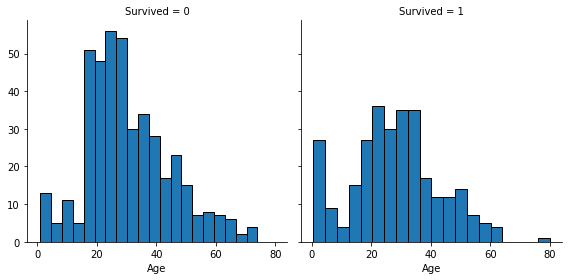

In [11]:
sa=sns.FacetGrid(train_df,col='Survived',height=4)
sa.map(plt.hist,'Age',bins=20,edgecolor="k")

***Observations:***
* Class 3 had the most number of passengers
* MOst of the passengers died in class 3
* Most of the passeners survived in class 1
* Infants in class 3 and class 2 survived more than in class 1
* Most peeople in age  range 17-30 died in class 3

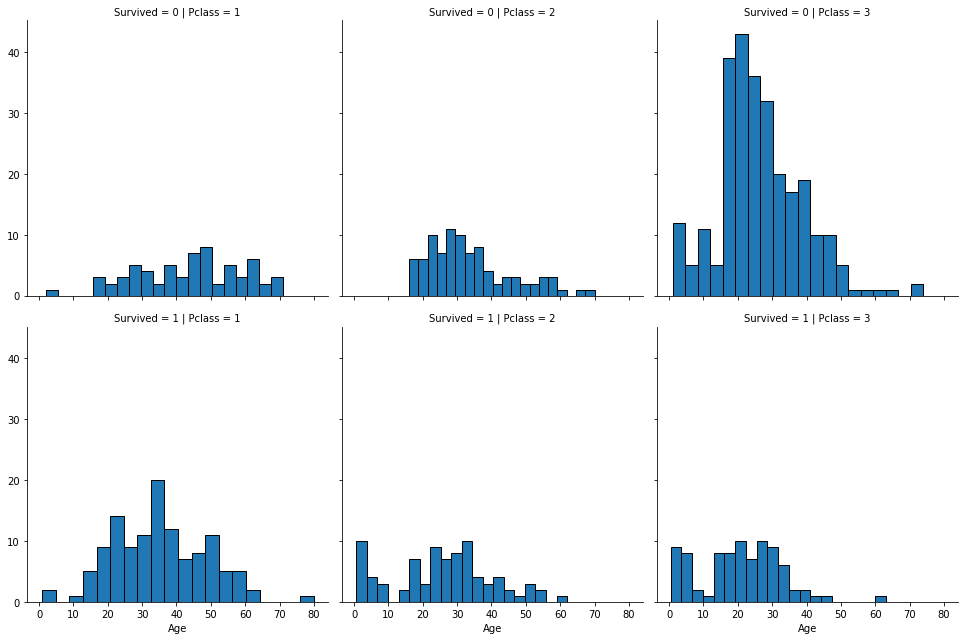

In [12]:
sc=sns.FacetGrid(train_df,row='Survived',col='Pclass',height=4.5)
a=sc.map(plt.hist , 'Age',bins=20, edgecolor='k')

***Corellating categorical features***:
   Finding corealtion between categorical fetures :Pclass ,embarked and Survived.

***Observations of categrical features:***
* Female had a higher suvival rate than male expect For port C where male have higher survival rate.
* This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation
* Males have better survival rate in Pclass=3 for embarked at port Q

/home/prakx2050/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/prakx2050/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/prakx2050/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


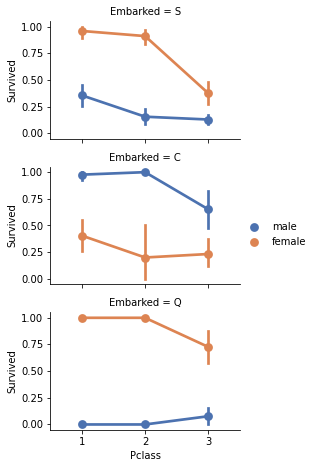

In [13]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

## Corelation betweeen numerical and categorical feeatures
We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric)

## Observations:
* Higher paying passengers had a better survival.Conifrms our  assumption for creating fare ranges.
* Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

## Decisions:
* Consider Banding Fare feature

/home/prakx2050/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


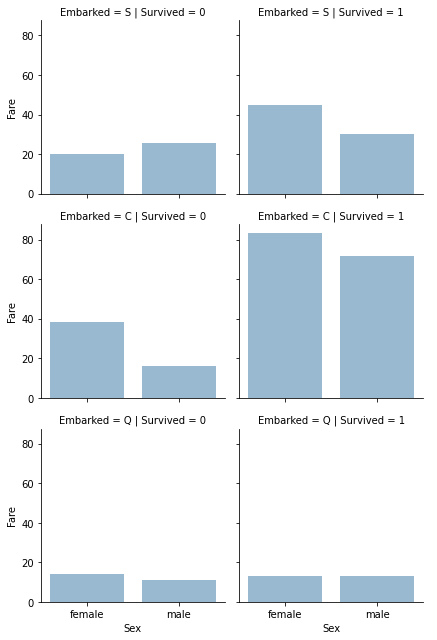

In [14]:
nc=sns.FacetGrid(train_df,col='Survived',row='Embarked')
nc.map(sns.barplot,'Sex','Fare',alpha=.5,ci=None)
nc.add_legend();

In [15]:
print("Shape Before",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)
train_df=train_df.drop(['Ticket','Cabin'],axis=1)
test_df=test_df.drop(['Ticket','Cabin'],axis=1)
combine=[train_df,test_df]
print("Shape After:",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)


Shape Before (891, 12) (418, 11) (891, 12) (418, 11)
Shape After: (891, 10) (418, 9) (891, 10) (418, 9)


### Extracting title feature

In [16]:
for dataset in combine:
    
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


* We can replace many titles with a more common name or classify them as Rare.

In [17]:
for dataset in combine:
    dataset ['Title']=dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


#### Convertig categorical title feature to ordinal.

In [18]:
title_mapping={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
   

In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


#### Dropping Name and Passenger ID feature

In [20]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

#### Converting a categorical feature¶
Now we convert categorical to numerical values .As most of the  model algorithms require them



In [21]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


### Completing a numerical continuous feature
Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

 We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and standard deviation.

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

/home/prakx2050/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


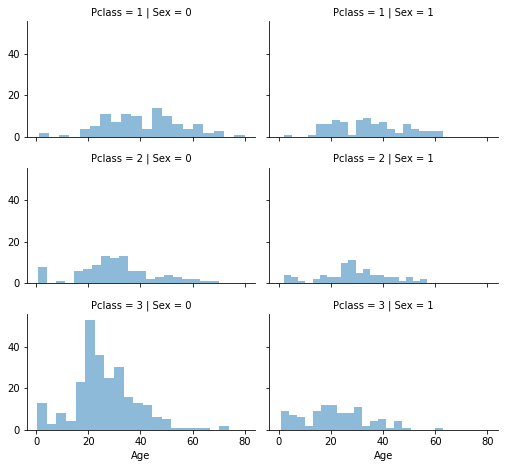

In [22]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [23]:
guess_ages=np.zeros((2,3))

In [24]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
train_df=combine[0]#Problem to find 
test_df=combine[1]#Problem to find
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [25]:
train_df['AgeBand']=pd.cut(train_df['Age'],5)
train_df[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace age based on  this bands.

In [26]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [27]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


#### Creating new featur combining exixting features
We create a new feature family using Parch and SIbP


In [28]:
for dataset in combine:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Creating a new feature called  IsAlone.

In [29]:
for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.



In [30]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]


We can also create an artificial feature combining Pclass and Age.


In [31]:

for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


#### Completing a categorical feature
Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [32]:
freq_port = train_df.Embarked.mode()[0]
freq_port

'S'

In [33]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### Converting categorical values too numerical values

In [34]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map({'S':0,'C':1,'Q':2})
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


Completing the fare featue with median faren as the test data has some missing fares.

In [35]:
# # test_df['Fare'].fillna(test_df['Fare'].median,inplace=True)
# train_df.info()

Creating FareBand

In [36]:
# train_df['FareBand']=pd.qcut(train_df['Fare'],4)
# train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

Converting the Fare feature to ordinal values based on the FareBand.

In [37]:
# for dataset in combine:
    
#     dataset.loc[ dataset['Fare'] <= 7.91, 'Fare']= 0
#     dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
#     dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
#     dataset.loc[ dataset['Fare'] > 31, 'Fare']= 3
#     dataset['Fare'] = dataset['Fare'].astype(int)

# train_df = train_df.drop(['FareBand'], axis=1)

# combine = [train_df, test_df]
    
# train_df.head(10)
train_df = train_df.drop(['Fare'], axis=1)
test_df = test_df.drop(['Fare'], axis=1)
combine=[train_df,test_df]

In [38]:
 test_df.head()

,PassengerId,Pclass,Sex,Age,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,2,1,1,6
1,893,3,1,2,0,3,0,6
2,894,2,0,3,2,1,1,6
3,895,3,0,1,0,1,1,3
4,896,3,1,1,0,3,0,3


In [61]:
# for dataset in combine:
#     dataset.drop('Fare',axis=1,inplace=True)

# train_df = train_df.drop(['FareBand'], axis=1)
# combine = [train_df, test_df]
    
# print(train_df.head(10))
# print(test_df.head(5))
test_df.head()

,PassengerId,Pclass,Sex,Age,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,2,1,1,6
1,893,3,1,2,0,3,0,6
2,894,2,0,3,2,1,1,6
3,895,3,0,1,0,1,1,3
4,896,3,1,1,0,3,0,3


# Model, predict and solve¶


In [40]:
X_train=train_df.drop('Survived',axis=1)
Y_train=train_df['Survived']
X_test=test_df.drop('PassengerId',axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

## Using LogisticRegression


In [41]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=1)
logreg.fit(X_train,Y_train)
logreg.score(X_train,Y_train)

0.80359147025813693

In [42]:
Y_pred=logreg.predict(X_test)

In [43]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)
logreg.coef_

array([[-0.69674223,  2.19967942,  0.27867996,  0.27170271,  0.39408116,
         0.22028018, -0.30311198]])

In [44]:
submission=pd.DataFrame({
    "PassengerId":test_df['PassengerId'],
    'Survived':Y_pred
})

In [45]:
#submission.to_csv('LogRegPreds.csv',index=False)
from sklearn.metrics import confusion_matrix


# Using RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

84.290000000000006

In [47]:
submission=pd.DataFrame({
    "PassengerId":test_df['PassengerId'],
    'Survived':Y_pred
})

In [48]:
submission.to_csv('RandomForestPreds.csv',index=False)

# Using DecisionTreeClassifier


In [49]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=1)
tree.fit(X_train,Y_train)
tree.score(X_train,Y_train)

0.84287317620650959

# EVALUTION

In [50]:
from sklearn.model_selection import train_test_split

train_X,val_X,train_y,val_y=train_test_split(X_train,Y_train,random_state=0)

In [51]:
print(train_X.shape,train_y.shape,val_X.shape,val_y.shape)

(668, 7) (668,) (223, 7) (223,)


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lrg=LogisticRegression(random_state=42).fit(train_X,train_y)
preds_y=lrg.predict(val_X)
print(lrg.classes_)
print("Confusion Matrix:")
confusion_matrix(val_y,preds_y)

[0 1]
Confusion Matrix:


array([[113,  26],
       [ 25,  59]])

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100).fit(train_X,train_y)
preds_ry=random_forest.predict(val_X)
print(random_forest.classes_)
confusion_matrix(val_y,preds_ry)
random_forest.score(val_X,val_y)

[0 1]


0.820627802690583

In [54]:
from sklearn.svm import SVC
svc=SVC(gamma=2).fit(train_X,train_y)
preds_sy=random_forest.predict(val_X)
print(svc.classes_)
print(confusion_matrix(val_y,preds_sy))
svc.score(val_X,val_y)

[0 1]
[[128  11]
 [ 29  55]]


0.820627802690583